**Задание 1**

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1. Как критики относятся к спортивным играм?
1. Критикам нравятся больше игры на PC или на PS4?
1. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, classification_report

In [2]:
vgsales = pd.read_csv('vgsales.csv', error_bad_lines=False)
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
vgsales.shape

(16719, 16)

In [4]:
# Ответим на 1 вопрос. Как критики относятся к спортивным играм?
# H0: Критики, в среднем, выставляют спортивным играм схожие оценки с другими играми
# H1: Критики склонны выставлять спортивным играм отличающиеся от остальных игр оценки

In [5]:
# Пустые значения колонки Critic_Score игнорируем
other_games = vgsales.loc[~(vgsales['Genre'] == 'Sports')]['Critic_Score'].dropna()
sport_games = vgsales.loc[vgsales['Genre'] == 'Sports']['Critic_Score'].dropna()


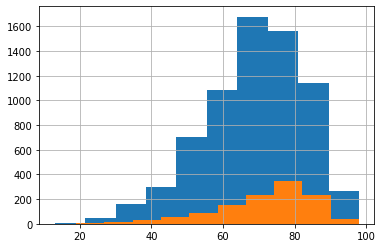

In [6]:
# Выборки независимы
# имеют нормальное распределение со смещением вправо
# применим для проверки гипотезы критерий Стьюдента t-test
# с поправкой на выборки с разной дисперсией
other_games.hist()
sport_games.hist()
plt.show()

In [7]:
# Уровень значимости установим в 5%
alpha = 0.05
t, p = st.ttest_ind(other_games, sport_games, equal_var=False)
print(p)
if p < alpha: 
    print('Отвергаем нулевую гипотезу. Критики склонны выставлять спортивным играм отличающиеся от остальных игр оценки')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Критики, в среднем, выставляют спортивным играм схожие оценки с другими играми')

1.181171308320441e-15
Отвергаем нулевую гипотезу. Критики склонны выставлять спортивным играм отличающиеся от остальных игр оценки


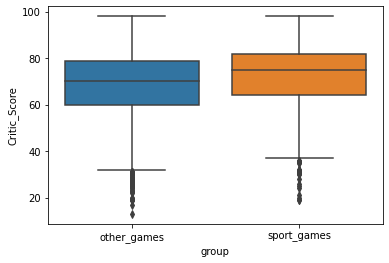

In [8]:
# Построим boxplot для наглядной оценки в лучшую или худшую сторону отличаются оценки критиков по спортивным играм
data_group = pd.DataFrame()
data_group['Critic_Score'] = other_games.append(sport_games)
data_group['group'] = ['other_games']*len(other_games)+['sport_games']*len(sport_games)

ax = sns.boxplot(x='group', y='Critic_Score', data=data_group)
plt.show()
# Наглядно представлено, что критики выставляют более высокие оценки спортивным играм в сравнении со всеми остальными

In [9]:
# Ответим на 2 вопрос. Критикам нравятся больше игры на PC или на PS4?
# H0: Оценки критиков на PC и PS4 одинаковые
# H1: Оценки критиков на PC и PS4 отличаются

In [10]:
# Пустые значения колонки Critic_Score игнорируем
PC_games = vgsales.loc[~(vgsales['Platform'] == 'PC')]['Critic_Score'].dropna()
PS4_games = vgsales.loc[vgsales['Platform'] == 'PS4']['Critic_Score'].dropna()

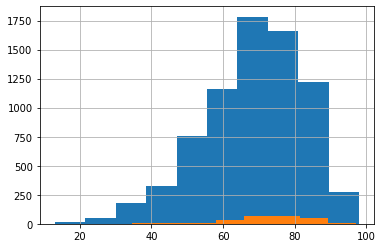

In [11]:
# выборки независимы и количественны
# # имеют нормальное распределение со смещением вправо
# применим для проверки гипотезы критерий Стьюдента t-test
# с поправкой на выборки с разной дисперсией
PC_games.hist()
PS4_games.hist()
plt.show()

In [12]:
# Уровень значимости установим в 5%
alpha = 0.05
t, p = st.ttest_ind(PC_games, PS4_games, equal_var=False)
print(p)
if p < alpha: 
    print('Отвергаем нулевую гипотезу. Оценки критиков на PC и PS4 отличаются')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Оценки критиков на PC и PS4 одинаковые')

3.7028448746457655e-06
Отвергаем нулевую гипотезу. Оценки критиков на PC и PS4 отличаются


In [13]:
# Т.к. альтернативная гипотеза, верна определим какой платформе выыставляются более высокие оценки
# Найдем медианное значение оценок на PC
# для сравнения возьмем медианное значение т.к. показатель менее подвержен выбросам, чем среднее
PC = PC_games.median()
PC

70.0

In [14]:
# Сформулируем гипотезу для одновыборочного теста, ответи на вопрос - оценки критиков на PS4 больше чем на PC?
# H0: Оценки критиков на PS4 <= 70
# H1: Оценки критиков на PS4 > 70

In [15]:
# После выполнения команды перезапустить среду
!pip install --upgrade scipy

In [16]:
from scipy import stats as st
# Уровень значимости установим в 5%
alpha = 0.05
stat, p = st.ttest_1samp(PS4_games, PC, alternative='greater')
p
print(p)
if p < alpha: 
    print('Отвергаем нулевую гипотезу. Оценки критиков на PS4 > 70')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Оценки критиков на PS4 <= 70')




0.00417294390340114
Отвергаем нулевую гипотезу. Оценки критиков на PS4 > 70


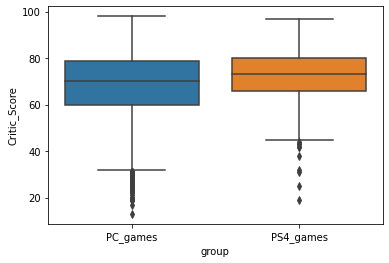

In [17]:
# Построим boxplot для наглядности оценок критиков
data_group = pd.DataFrame()
data_group['Critic_Score'] = PC_games.append(PS4_games)
data_group['group'] = ['PC_games']*len(PC_games)+['PS4_games']*len(PS4_games)

ax = sns.boxplot(x='group', y='Critic_Score', data=data_group)
plt.show()
# Делаем вывод о том, что оценки критиков платформе PS4 и PC различны и это различие статистически значимо с уровнем доверия 95%
# Оценки критиков платформе PS4 выше, чем платформе PC

In [18]:
# Подскажите ход моих мыслей верен:
# Мы можем проверить только односложные гипотезы говорящие только да или нет.
# И если вопрос сформулированный на "человеческом языке" сложный, то требуется для ответа на него формулировать цепочку гипотез
# с подтверждением или опровержением на каждом шаге? Своего рода система условий или решающих деревьев?

In [19]:
# Ответим на 3 вопрос. Критикам больше нравятся стрелялки или стратегии?
# Вначале ответим различны ли статистически оценки критиков по отношению к Shooter и Strategy
# Если различны то определим более высоко оцениваемый жанр критиками.

In [20]:
# H0: Оценки критиков по отношению к Shooter и Strategy одинаковы/схожи
# H1: Оценки критиков по отношению к Shooter и Strategy различны

In [21]:
vgsales.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [22]:
# Пустые значения колонки Critic_Score игнорируем
shooter_games = vgsales.loc[~(vgsales['Genre'] == 'Shooter')]['Critic_Score'].dropna()
strategy_games = vgsales.loc[vgsales['Genre'] == 'Strategy']['Critic_Score'].dropna()


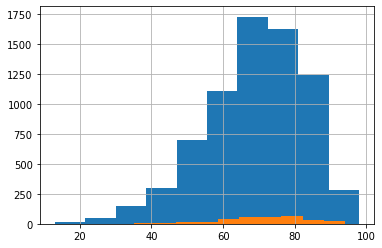

In [23]:
# выборки независимы и количественны
# имеют нормальное распределение со смещением вправо
# применим для проверки гипотезы критерий Стьюдента t-test
# с поправкой на выборки с разной дисперсией
shooter_games.hist()
strategy_games.hist()
plt.show()

In [24]:
# Уровень значимости установим в 5%
alpha = 0.05
t, p = st.ttest_ind(shooter_games, strategy_games, equal_var=False)
print(p)
if p < alpha: 
    print('H1: Отвергаем нулевую гипотезу. Оценки критиков по отношению к Shooter и Strategy различны')
else:
    print('H0: Не отвергаем нулевую нулевую гипотезу. Оценки критиков по отношению к Shooter и Strategy одинаковы/схожи')

4.114080513317945e-06
H1: Отвергаем нулевую гипотезу. Оценки критиков по отношению к Shooter и Strategy различны


In [25]:
# Т.к. альтернативная гипотеза, верна определим какому жанру выставляются более высокие оценки
# Найдем медианное значение оценок на Strategy
# для сравнения возьмем медианное значение т.к. показатель менее подвержен выбросам, чем среднее
strategy = strategy_games.median()
strategy

73.0

In [26]:
# Сформулируем гипотезу для одновыборочного теста, ответим на вопрос - оценки критиков на Strategy больше чем на Shooter?
# H0: Оценки критиков на Shooter <= 73
# H1: Оценки критиков на Shooter > 73

In [27]:
# Уровень значимости установим в 5%
alpha = 0.05
stat, p = st.ttest_1samp(shooter_games, strategy, alternative='greater')
p
print(p)
if p < alpha: 
    print('H1: Отвергаем нулевую гипотезу. Оценки критиков на Shooter > 73')
else:
    print('H0: Не отвергаем нулевую нулевую гипотезу. Оценки критиков на Shooter <= 73')


1.0
H0: Не отвергаем нулевую нулевую гипотезу. Оценки критиков на Shooter <= 73


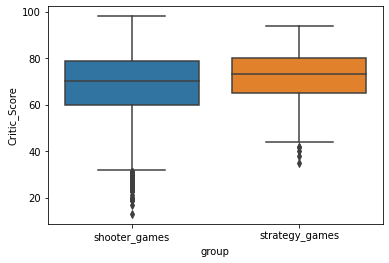

In [28]:
# Построим boxplot для наглядности оценок критиков
data_group = pd.DataFrame()
data_group['Critic_Score'] = shooter_games.append(strategy_games)
data_group['group'] = ['shooter_games']*len(shooter_games)+['strategy_games']*len(strategy_games)

ax = sns.boxplot(x='group', y='Critic_Score', data=data_group)
plt.show()
# Делаем вывод о том, что оценки критиков по жанрам Shooter и Strategy различны и это различие статистически значимо с уровнем доверия 95%
# Жанр Shooter оценивается ниже, чем Strategy

**Задание 2**

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1. Привидите весь текст к нижнему регистру;
1. Удалите мусорные символы;
1. Удалите стоп-слова;
1. Приведите все слова к нормальной форме;
1. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```
Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);
6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
1. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
1. Опишите результаты при помощи confusion_matrix;
1. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [29]:
spam = pd.read_csv('spam.csv')
spam['Message_lower'] = spam['Message'].str.lower()

In [30]:
# уберем все служебные символы (или re.sub('[^A-Za-z0-9]+', '', text))
spam['Message_clean'] = [re.sub('[\W_]+',' ', text) for text in spam['Message']]
# преобразуем текст в список слов
spam['Message_split'] = spam['Message'].str.split(' ')
spam.head()

,Category,Message,Message_lower,Message_clean,Message_split
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor..., U, c, already..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...,"[Nah, I, don't, think, he, goes, to, usf,, he,..."


In [31]:
# Уберем стоп-слова из сообщений
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
spam['without_sw'] = [[word for word in text if word not in stopwords_set] for text in spam['Message_split']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
# Проведем лемматизацию (приведение к нормальной форме) слов в колонке without_sw
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
spam['lemmatized_list'] = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in spam['without_sw']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [33]:
# преобразуем список очещенных слов обратно в единый текст
spam['lemmatized_text'] =pd.DataFrame([[' '.join(x)] for x in spam['lemmatized_list']])

In [34]:
def category_bool(df):
    """Преобразование Category из str в int"""
    if df['Category']=='ham':
        return 0
    else:
        return 1

In [35]:
# Конвертируем категорию в целочисленный тип
spam['Category_bool'] = spam.apply(category_bool, axis=1)

In [36]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5572 non-null   object
 1   Message          5572 non-null   object
 2   Message_lower    5572 non-null   object
 3   Message_clean    5572 non-null   object
 4   Message_split    5572 non-null   object
 5   without_sw       5572 non-null   object
 6   lemmatized_list  5572 non-null   object
 7   lemmatized_text  5572 non-null   object
 8   Category_bool    5572 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 391.9+ KB


In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# http://nlpx.net/archives/57
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(spam['lemmatized_text'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam['Category_bool'], test_size=0.30, random_state=42)

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:

# проверим классы на сбалансированность
spam_l = len(spam['Category'][spam['Category']=='spam'])
ham_l = len(spam['Category'][spam['Category']=='ham'])

print(ham_l/spam_l)
# классы слабо сбалансированны
# соотношение представителей каждого класса отличается 6.5 раз
# Критерий AUC-ROC устойчив к несбалансированным классам (правда есть моменты), используем для оценки качества модели именно этот параметр

6.459170013386881


In [100]:
# Вычислим критерий roc-auc (площадь кривой roc-auc нормализованная)
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9913057419100236

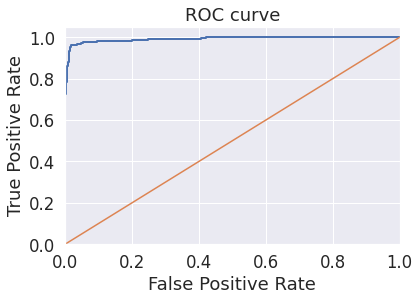

In [101]:
#https://habr.com/ru/company/ods/blog/328372/
# https://coderoad.ru/25009284/%D0%9A%D0%B0%D0%BA-plot-ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F-%D0%B2-Python 

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# По данному критерию качество построенной модели достаточно высокое и составляет свыше 99%

In [ ]:
# Оценим модель по другим критерия в качестве учебных целей

In [73]:
# Литература
# https://www.machinelearningmastery.ru/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix
# https://www.bigdataschool.ru/blog/machine-learning-confusion-matrix.html
# https://habr.com/ru/company/ods/blog/328372/

# Оценим нашу модель по матрице ошибок (матрице путаницы)
y_true = y_test
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(1446, 2, 61, 163)

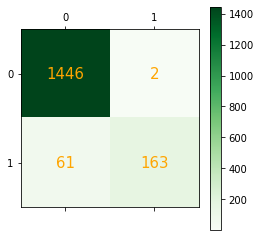

In [41]:
# https://coderoad.ru/58652999/%D0%9A%D0%B0%D0%BA-%D1%8F-%D0%BC%D0%BE%D0%B3%D1%83-%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C-%D1%85%D0%BE%D1%80%D0%BE%D1%88%D1%83%D1%8E-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8E-%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8B-%D0%BF%D1%83%D1%82%D0%B0%D0%BD%D0%B8%D1%86%D1%8B
cm=confusion_matrix(y_true,y_pred)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.annotate(cm[i,j],xy=(j,i),horizontalalignment='center',verticalalignment='center',size=15,color='orange')

plt.show()

In [42]:
# Для нашей выборки accuracy не самый удачный критерий оценки: не сбалансированные классы
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9623205741626795


0.9623205741626795

In [102]:
# оценим показатели precision, recall и F-меру, хотя они также не самые удачные для оценки моделей при несбалансированных классах
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision, recall)

beta = 1
f_score= (1+beta**2)*precision*recall/(beta**2*precision+recall)
f_score

0.9878787878787879 0.7276785714285714


0.8380462724935731

In [46]:
# Сделаем датафрейм, в котором соспоставлены ошибочные предсказания и изначальное сообщение
df_match_error = spam.loc[X_test.index.tolist()][['Category', 'Message', 'Category_bool']]

In [47]:
# spam == 1
# ham == 0
df_match_error['y_pred'] = y_pred
df_match_error = df_match_error[df_match_error['Category_bool']!=df_match_error['y_pred']]
df_match_error

,Category,Message,Category_bool,y_pred
881,spam,Reminder: You have not downloaded the content ...,1,0
1961,spam,Guess what! Somebody you know secretly fancies...,1,0
3864,spam,Oh my god! I've found your number again! I'm s...,1,0
2575,spam,Your next amazing xxx PICSFREE1 video will be ...,1,0
3548,spam,Rock yr chik. Get 100's of filthy films &XXX p...,1,0
...,...,...,...,...
191,spam,Are you unique enough? Find out from 30th Augu...,1,0
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...,1,0
752,spam,You have an important customer service announc...,1,0
309,spam,TheMob> Check out our newest selection of cont...,1,0
